# Conjunto de dados de estatísticas de saúde cardíaca


Esse conjunto de dados inclui informações demográficas, sinais vitais e indicadores do estado de saúde do coração dos indivíduos. Inclui características como idade, sexo, pressão arterial, níveis de colesterol e se o indivíduo sofreu um ataque cardíaco. O conjunto de dados é valioso para analisar tendências relacionadas à saúde cardiovascular e avaliar os fatores de risco associados a doenças cardíacas. Pesquisadores e profissionais de saúde podem utilizar esses dados para identificar padrões, desenvolver modelos preditivos e formular intervenções personalizadas para prevenção e manejo de doenças cardíacas.

Link: https://www.kaggle.com/datasets/mahad049/heart-health-stats-dataset

In [82]:
import pandas as pd

dados = pd.read_csv('/content/Heart_health.csv', sep = ',')
dados.head()

ID             Name  Age  Gender  Height(cm)  Weight(kg)  \
0   1         John Doe   45    Male         175          80   
1   2       Jane Smith   35  Female         160          65   
2   3  Michael Johnson   55    Male         180          85   
3   4      Sarah Brown   40  Female         165          70   
4   5        David Lee   50    Male         170          75   

  Blood Pressure(mmHg)  Cholesterol(mg/dL)  Glucose(mg/dL) Smoker  \
0               120/80                 200              90     No   
1               110/70                 180              80     No   
2               130/85                 220              95    Yes   
3               115/75                 190              85     No   
4               125/80                 210              92    Yes   

   Exercise(hours/week)  Heart Attack  
0                     3             0  
1                     2             0  
2                     4             1  
3                     3             0  
4                     2             1

In [83]:
dados.drop(columns = ['ID','Name'], inplace = True)
dados.head()

Age  Gender  Height(cm)  Weight(kg) Blood Pressure(mmHg)  \
0   45    Male         175          80               120/80   
1   35  Female         160          65               110/70   
2   55    Male         180          85               130/85   
3   40  Female         165          70               115/75   
4   50    Male         170          75               125/80   

   Cholesterol(mg/dL)  Glucose(mg/dL) Smoker  Exercise(hours/week)  \
0                 200              90     No                     3   
1                 180              80     No                     2   
2                 220              95    Yes                     4   
3                 190              85     No                     3   
4                 210              92    Yes                     2   

   Heart Attack  
0             0  
1             0  
2             1  
3             0  
4             1

In [84]:
# Vamos criar a PAM
dados[['PAS', 'PAD']] = dados['Blood Pressure(mmHg)'].str.split('/', expand=True)

dados.head()

Age  Gender  Height(cm)  Weight(kg) Blood Pressure(mmHg)  \
0   45    Male         175          80               120/80   
1   35  Female         160          65               110/70   
2   55    Male         180          85               130/85   
3   40  Female         165          70               115/75   
4   50    Male         170          75               125/80   

   Cholesterol(mg/dL)  Glucose(mg/dL) Smoker  Exercise(hours/week)  \
0                 200              90     No                     3   
1                 180              80     No                     2   
2                 220              95    Yes                     4   
3                 190              85     No                     3   
4                 210              92    Yes                     2   

   Heart Attack  PAS PAD  
0             0  120  80  
1             0  110  70  
2             1  130  85  
3             0  115  75  
4             1  125  80

In [85]:
dados.drop('Blood Pressure(mmHg)', axis=1, inplace=True)
dados.head()

Age  Gender  Height(cm)  Weight(kg)  Cholesterol(mg/dL)  Glucose(mg/dL)  \
0   45    Male         175          80                 200              90   
1   35  Female         160          65                 180              80   
2   55    Male         180          85                 220              95   
3   40  Female         165          70                 190              85   
4   50    Male         170          75                 210              92   

  Smoker  Exercise(hours/week)  Heart Attack  PAS PAD  
0     No                     3             0  120  80  
1     No                     2             0  110  70  
2    Yes                     4             1  130  85  
3     No                     3             0  115  75  
4    Yes                     2             1  125  80

In [86]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   724 non-null    int64 
 1   Gender                724 non-null    object
 2   Height(cm)            724 non-null    int64 
 3   Weight(kg)            724 non-null    int64 
 4   Cholesterol(mg/dL)    724 non-null    int64 
 5   Glucose(mg/dL)        724 non-null    int64 
 6   Smoker                724 non-null    object
 7   Exercise(hours/week)  724 non-null    int64 
 8   Heart Attack          724 non-null    int64 
 9   PAS                   724 non-null    object
 10  PAD                   724 non-null    object
dtypes: int64(7), object(4)
memory usage: 62.3+ KB


In [87]:
dados = dados.astype({'PAS':'int64', 'PAD':'int64'})

In [88]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   724 non-null    int64 
 1   Gender                724 non-null    object
 2   Height(cm)            724 non-null    int64 
 3   Weight(kg)            724 non-null    int64 
 4   Cholesterol(mg/dL)    724 non-null    int64 
 5   Glucose(mg/dL)        724 non-null    int64 
 6   Smoker                724 non-null    object
 7   Exercise(hours/week)  724 non-null    int64 
 8   Heart Attack          724 non-null    int64 
 9   PAS                   724 non-null    int64 
 10  PAD                   724 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 62.3+ KB


In [89]:
dados['PAM'] = (dados['PAS'] + 2 * dados['PAD'])/3
dados

Age  Gender  Height(cm)  Weight(kg)  Cholesterol(mg/dL)  Glucose(mg/dL)  \
0     45    Male         175          80                 200              90   
1     35  Female         160          65                 180              80   
2     55    Male         180          85                 220              95   
3     40  Female         165          70                 190              85   
4     50    Male         170          75                 210              92   
..   ...     ...         ...         ...                 ...             ...   
719   39  Female         166          68                 195              88   
720   56    Male         179          83                 220             100   
721   43  Female         167          70                 200              92   
722   53    Male         182          86                 225              98   
723   47  Female         170          73                 205              94   

    Smoker  Exercise(hours/week)  Heart Attack  PAS  PAD         PAM  
0       No                     3             0  120   80   93.333333  
1       No                     2             0  110   70   83.333333  
2      Yes                     4             1  130   85  100.000000  
3       No                     3             0  115   75   88.333333  
4      Yes                     2             1  125   80   95.000000  
..     ...                   ...           ...  ...  ...         ...  
719     No                     3             0  118   76   90.000000  
720     No                     2             1  123   80   94.333333  
721     No                     2             0  120   78   92.000000  
722    Yes                     2             1  125   78   93.666667  
723    Yes                     3             1  121   77   91.666667  

[724 rows x 12 columns]

In [90]:
dados.drop(columns = ['PAS','PAD'], inplace = True)
dados

Age  Gender  Height(cm)  Weight(kg)  Cholesterol(mg/dL)  Glucose(mg/dL)  \
0     45    Male         175          80                 200              90   
1     35  Female         160          65                 180              80   
2     55    Male         180          85                 220              95   
3     40  Female         165          70                 190              85   
4     50    Male         170          75                 210              92   
..   ...     ...         ...         ...                 ...             ...   
719   39  Female         166          68                 195              88   
720   56    Male         179          83                 220             100   
721   43  Female         167          70                 200              92   
722   53    Male         182          86                 225              98   
723   47  Female         170          73                 205              94   

    Smoker  Exercise(hours/week)  Heart Attack         PAM  
0       No                     3             0   93.333333  
1       No                     2             0   83.333333  
2      Yes                     4             1  100.000000  
3       No                     3             0   88.333333  
4      Yes                     2             1   95.000000  
..     ...                   ...           ...         ...  
719     No                     3             0   90.000000  
720     No                     2             1   94.333333  
721     No                     2             0   92.000000  
722    Yes                     2             1   93.666667  
723    Yes                     3             1   91.666667  

[724 rows x 10 columns]

In [91]:
dados = pd.get_dummies(data= dados, columns=['Gender','Smoker','Heart Attack'], drop_first = True)
dados.head()

Age  Height(cm)  Weight(kg)  Cholesterol(mg/dL)  Glucose(mg/dL)  \
0   45         175          80                 200              90   
1   35         160          65                 180              80   
2   55         180          85                 220              95   
3   40         165          70                 190              85   
4   50         170          75                 210              92   

   Exercise(hours/week)         PAM  Gender_Male  Smoker_Yes  Heart Attack_1  
0                     3   93.333333         True       False           False  
1                     2   83.333333        False       False           False  
2                     4  100.000000         True        True            True  
3                     3   88.333333        False       False           False  
4                     2   95.000000         True        True            True

In [92]:
# Renomeando as colunas usando um dicionário
dados = dados.rename(columns={'Age': 'Idade', 'Height(cm)': 'Altura',
                        'Weight(kg)' : 'Peso',
                        'Cholesterol(mg/dL)' : 'Colesterol',
                        'Glucose(mg/dL)':'Glicose',
                        'Exercise(hours/week)': "Exercicio",
                        'Gender_Male':'Genero',
                        'Smoker_Yes':'Fuma',
                        'Heart Attack_1':'Target'})

# Exibindo o DataFrame com os nomes das colunas atualizados
dados.head()


Idade  Altura  Peso  Colesterol  Glicose  Exercicio         PAM  Genero  \
0     45     175    80         200       90          3   93.333333    True   
1     35     160    65         180       80          2   83.333333   False   
2     55     180    85         220       95          4  100.000000    True   
3     40     165    70         190       85          3   88.333333   False   
4     50     170    75         210       92          2   95.000000    True   

    Fuma  Target  
0  False   False  
1  False   False  
2   True    True  
3  False   False  
4   True    True

In [93]:
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats # estatística chi2
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
import plotly.graph_objs as go # gráfico 3D
import statsmodels.formula.api as smf # estimação do modelo logístico binário

import warnings

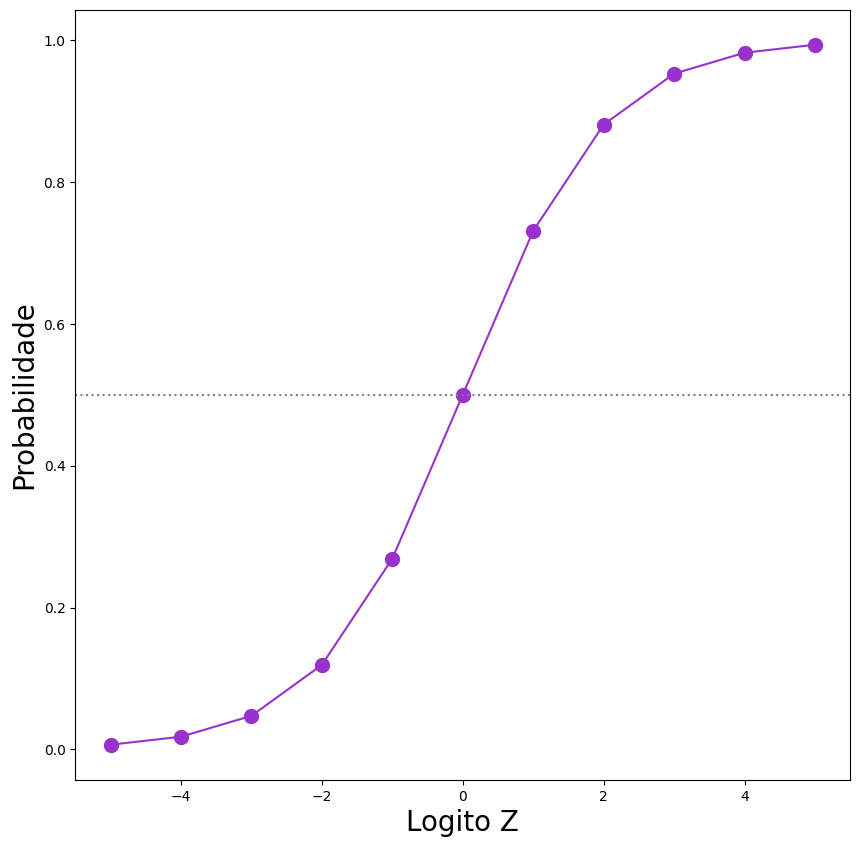

In [94]:
# In[ ]: Plotando a curva sigmóide teórica de ocorrência de um evento para um
#range do logito z entre -5 e +5

from math import exp

#Estabelecendo uma função para a probabilidade de ocorrência de um evento
def prob(z):
    return 1 / (1 + exp(-z))

logitos = []
probs = []

for i in np.arange(-5,6):
    logitos.append(i)
    probs.append(prob(i))

df = pd.DataFrame({'logito':logitos,'probs':probs})

plt.figure(figsize=(10,10))
plt.plot(df.logito, df.probs, color='darkorchid')
plt.scatter(df.logito, df.probs, color = 'darkorchid', s=100)
plt.axhline(y = df.probs.mean(), color = 'grey', linestyle = ':')
plt.xlabel("Logito Z", fontsize=20)
plt.ylabel("Probabilidade", fontsize=20)
plt.show()

In [95]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Idade       724 non-null    int64  
 1   Altura      724 non-null    int64  
 2   Peso        724 non-null    int64  
 3   Colesterol  724 non-null    int64  
 4   Glicose     724 non-null    int64  
 5   Exercicio   724 non-null    int64  
 6   PAM         724 non-null    float64
 7   Genero      724 non-null    bool   
 8   Fuma        724 non-null    bool   
 9   Target      724 non-null    bool   
dtypes: bool(3), float64(1), int64(6)
memory usage: 41.8 KB


In [96]:
dados['Target'] = dados['Target'].map({False: 0, True: 1})
dados['Target'] = dados['Target'].astype(int)

In [97]:
dados['Fuma'] = dados['Fuma'].map({False: 0, True: 1})
dados['Fuma'] = dados['Fuma'].astype(int)

In [98]:
dados['Genero'] = dados['Genero'].map({False: 0, True: 1})
dados['Genero'] = dados['Genero'].astype(int)

In [99]:
lista_colunas = list(dados.drop(columns=['Target']).columns)

formula_dummies_modelo = ' + '.join(lista_colunas)

formula_dummies_modelo = "Target ~ " + formula_dummies_modelo

print("Fórmula utilizada: ",formula_dummies_modelo)

#Modelo propriamente dito
modelo = sm.Logit.from_formula(formula_dummies_modelo,dados).fit()

#Parâmetros do modelo
modelo.summary()

Fórmula utilizada:  Target ~ Idade + Altura + Peso + Colesterol + Glicose + Exercicio + PAM + Genero + Fuma
         Current function value: 0.007888
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  724
Model:                          Logit   Df Residuals:                      714
Method:                           MLE   Df Model:                            9
Date:                Wed, 10 Apr 2024   Pseudo R-squ.:                  0.9883
Time:                        03:38:55   Log-Likelihood:                -5.7109
converged:                      False   LL-Null:                       -487.42
Covariance Type:            nonrobust   LLR p-value:                1.327e-201
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -876.4681        nan        nan        nan         nan         nan
Idade         53.6145        nan        nan        nan         nan         nan
Altura      -158.3529        nan        nan        nan         nan         nan
Peso          96.4619   2.01e+05      0.000      1.000   -3.94e+05    3.94e+05
Colesterol    32.0682   7.87e+04      0.000      1.000   -1.54e+05    1.54e+05
Glicose       52.9770        nan        nan        nan         nan         nan
Exercicio    266.1254        nan        nan        nan         nan         nan
PAM           65.8390        nan        nan        nan         nan         nan
Genero       323.4126        nan        nan        nan         nan         nan
Fuma          58.4615   1.19e+05      0.000      1.000   -2.32e+05    2.32e+05
==============================================================================

Possibly complete quasi-separation: A fraction 0.97 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):

    values = predicts.values

    predicao_binaria = []

    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)

    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()

    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


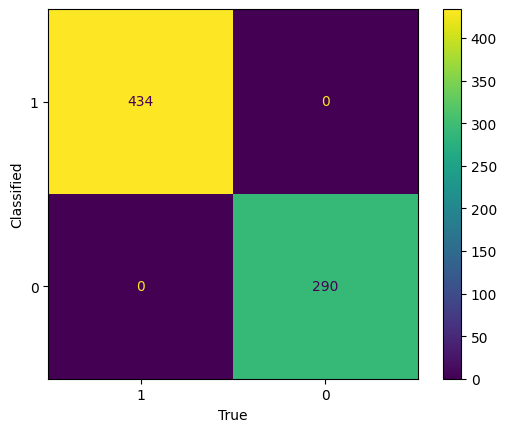

Sensitividade  Especificidade  Acurácia
0            1.0             1.0       1.0

In [101]:
# Adicionando os valores previstos de probabilidade na base de dados
dados['phat'] = modelo.predict()

#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=dados['Target'],
                predicts=dados['phat'],
                cutoff=0.50)

In [102]:
def espec_sens(observado,predicts):

    # adicionar objeto com os valores dos predicts
    values = predicts.values

    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)

    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []

    for cutoff in cutoffs:

        predicao_binaria = []

        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)

        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)

        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)

    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [103]:
dados_plotagem = espec_sens(observado = dados['Target'],
                            predicts = dados['phat'])
dados_plotagem

cutoffs  sensitividade  especificidade
0       0.00       1.000000             0.0
1       0.01       1.000000             1.0
2       0.02       1.000000             1.0
3       0.03       1.000000             1.0
4       0.04       1.000000             1.0
..       ...            ...             ...
96      0.96       0.944700             1.0
97      0.97       0.944700             1.0
98      0.98       0.944700             1.0
99      0.99       0.944700             1.0
100     1.00       0.935484             1.0

[101 rows x 3 columns]

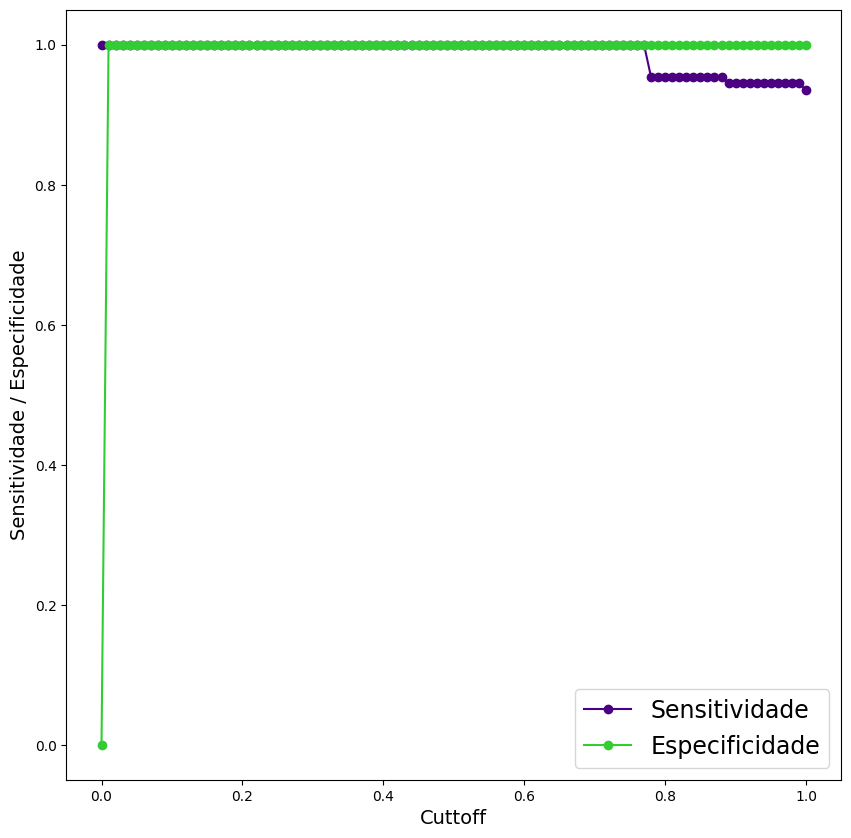

In [104]:
plt.figure(figsize=(10,10))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color='indigo')
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color='limegreen')
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel('Cuttoff', fontsize=14)
plt.ylabel('Sensitividade / Especificidade', fontsize=14)
plt.show()

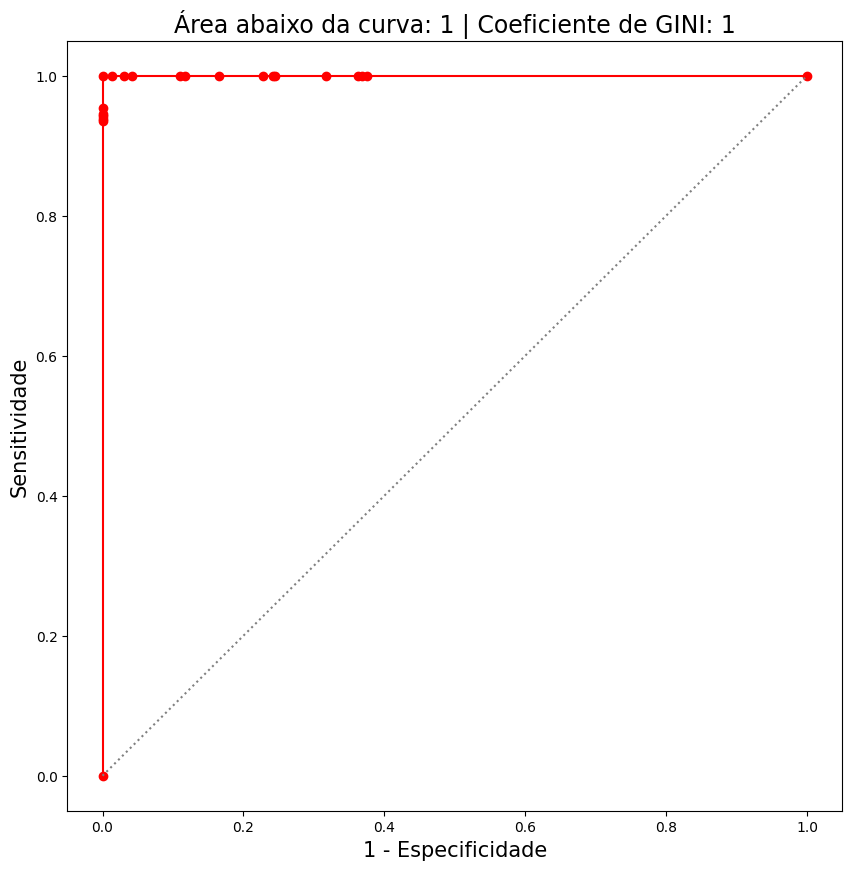

In [105]:
from sklearn.metrics import roc_curve, auc

#Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(dados['Target'],
                                dados['phat'])
roc_auc = auc(fpr, tpr)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

#Plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color='red')
plt.plot(fpr,fpr, ':', color='gray')
plt.title('Área abaixo da curva: %g' % round(roc_auc,4) +
          ' | Coeficiente de GINI: %g' % round(gini,4), fontsize=17)
plt.xlabel('1 - Especificidade', fontsize=15)
plt.ylabel('Sensitividade', fontsize=15)
plt.show()

In [106]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=992b4a4be8d952c862b1ae74fb5e23621af6d9ed350737a7d207e31a6094f92b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [107]:
from ydata_profiling import ProfileReport ## https://docs.profiling.ydata.ai/latest/

ProfileReport(dados)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [108]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 961.9 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=31ed4696717418a9795d02647c6337a96e73c35525401e2b43d09297eb8bf76f
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [109]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.2 MB/s eta 0:00:00


In [110]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [112]:
dados.drop('phat', axis =1, inplace= True)


In [113]:
#%% Teste de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(dados)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 9438.726851528476
p-value : 0.0


In [114]:
#%% Estatística KMO

kmo_all, kmo_model = calculate_kmo(dados)

print(f'kmo_model : {kmo_model}')

kmo_model : 0.8250769011759442


In [115]:
fa = FactorAnalyzer()
fa.fit(dados)

FactorAnalyzer(rotation_kwargs={})

In [116]:

ev, v = fa.get_eigenvalues()

print(ev)

[6.5790454  1.18531575 0.88370995 0.51902278 0.26932688 0.2551836
 0.14645309 0.11034753 0.03868999 0.01290503]


In [117]:
fa.set_params(n_factors = 2, method = 'principal', rotation = None)
fa.fit(dados)


FactorAnalyzer(method='principal', n_factors=2, rotation=None,
               rotation_kwargs={})

In [118]:
#%% Eigenvalues, variâncias e variâncias acumulada

eigen_fatores = fa.get_factor_variance()
eigen_fatores

tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   6.579045   0.657905             0.657905
Fator 2   1.185316   0.118532             0.776436


In [119]:
cargas_fatores = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = dados.columns
tabela_cargas

print(tabela_cargas)

             Fator 1   Fator 2
Idade       0.787256 -0.384336
Altura      0.950951 -0.045871
Peso        0.963707 -0.048029
Colesterol  0.955201 -0.144910
Glicose     0.922047 -0.158601
Exercicio   0.560944  0.593836
PAM         0.885684  0.037453
Genero      0.694726  0.272785
Fuma        0.092104  0.744975
Target      0.879450  0.059954


In [120]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = dados.columns
tabela_comunalidades

print(tabela_comunalidades)

            Comunalidades
Idade            0.767486
Altura           0.906411
Peso             0.931038
Colesterol       0.933407
Glicose          0.875325
Exercicio        0.667300
PAM              0.785840
Genero           0.557056
Fuma             0.563471
Target           0.777027


In [121]:
#%% Resultados dos fatores para as observações do dataset (predict)

predict_fatores= pd.DataFrame(fa.transform(dados))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]

print(predict_fatores)

# Adicionando ao dataset

dados = pd.concat([dados.reset_index(drop=True), predict_fatores], axis=1)

dados

      Fator 1   Fator 2
0    0.042424 -0.232878
1   -2.065958 -0.233633
2    1.492573  0.906246
3   -1.187205 -0.163842
4    0.351771  0.305631
..        ...       ...
719 -1.001993 -0.242295
720  1.147401 -1.642689
721 -0.698990 -1.106755
722  1.247423 -0.306625
723  0.001655  0.478832

[724 rows x 2 columns]


Idade  Altura  Peso  Colesterol  Glicose  Exercicio         PAM  Genero  \
0       45     175    80         200       90          3   93.333333       1   
1       35     160    65         180       80          2   83.333333       0   
2       55     180    85         220       95          4  100.000000       1   
3       40     165    70         190       85          3   88.333333       0   
4       50     170    75         210       92          2   95.000000       1   
..     ...     ...   ...         ...      ...        ...         ...     ...   
719     39     166    68         195       88          3   90.000000       0   
720     56     179    83         220      100          2   94.333333       1   
721     43     167    70         200       92          2   92.000000       0   
722     53     182    86         225       98          2   93.666667       1   
723     47     170    73         205       94          3   91.666667       0   

     Fuma  Target   Fator 1   Fator 2  
0       0       0  0.042424 -0.232878  
1       0       0 -2.065958 -0.233633  
2       1       1  1.492573  0.906246  
3       0       0 -1.187205 -0.163842  
4       1       1  0.351771  0.305631  
..    ...     ...       ...       ...  
719     0       0 -1.001993 -0.242295  
720     0       1  1.147401 -1.642689  
721     0       0 -0.698990 -1.106755  
722     1       1  1.247423 -0.306625  
723     1       1  0.001655  0.478832  

[724 rows x 12 columns]

In [122]:

corr_fator = pg.rcorr(dados[['Fator 1','Fator 2']], method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
print(corr_fator)

        Fator 1 Fator 2
Fator 1       -        
Fator 2    -0.0       -


In [123]:
# Renomeando as colunas usando um dicionário
dados = dados.rename(columns={'Fator 1': 'Fator1', 'Fator 2': 'Fator2'})

# Exibindo o DataFrame com os nomes das colunas atualizados
dados.head()

Idade  Altura  Peso  Colesterol  Glicose  Exercicio         PAM  Genero  \
0     45     175    80         200       90          3   93.333333       1   
1     35     160    65         180       80          2   83.333333       0   
2     55     180    85         220       95          4  100.000000       1   
3     40     165    70         190       85          3   88.333333       0   
4     50     170    75         210       92          2   95.000000       1   

   Fuma  Target    Fator1    Fator2  
0     0       0  0.042424 -0.232878  
1     0       0 -2.065958 -0.233633  
2     1       1  1.492573  0.906246  
3     0       0 -1.187205 -0.163842  
4     1       1  0.351771  0.305631

In [124]:
colunas = ['Fator1','Fator2','Target']
dados2 = dados[colunas].copy()
dados2

Fator1    Fator2  Target
0    0.042424 -0.232878       0
1   -2.065958 -0.233633       0
2    1.492573  0.906246       1
3   -1.187205 -0.163842       0
4    0.351771  0.305631       1
..        ...       ...     ...
719 -1.001993 -0.242295       0
720  1.147401 -1.642689       1
721 -0.698990 -1.106755       0
722  1.247423 -0.306625       1
723  0.001655  0.478832       1

[724 rows x 3 columns]

In [125]:
lista_colunas = list(dados2.drop(columns=['Target']).columns)

formula_dummies_modelo = ' + '.join(lista_colunas)

formula_dummies_modelo = "Target ~ " + formula_dummies_modelo

print("Fórmula utilizada: ",formula_dummies_modelo)

#Modelo propriamente dito
modelo = sm.Logit.from_formula(formula_dummies_modelo,
                                               dados2).fit()

#Parâmetros do modelo
modelo.summary()

Fórmula utilizada:  Target ~ Fator1 + Fator2
Optimization terminated successfully.
         Current function value: 0.012499
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  724
Model:                          Logit   Df Residuals:                      721
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Apr 2024   Pseudo R-squ.:                  0.9814
Time:                        03:41:38   Log-Likelihood:                -9.0492
converged:                       True   LL-Null:                       -487.42
Covariance Type:            nonrobust   LLR p-value:                1.759e-208
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5127      1.226      3.681      0.000       2.110       6.915
Fator1        14.9168      2.977      5.011      0.000       9.083      20.751
Fator2        -0.7795      0.918     -0.849      0.396      -2.578       1.019
==============================================================================

Possibly complete quasi-separation: A fraction 0.68 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):

    values = predicts.values

    predicao_binaria = []

    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)

    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()

    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

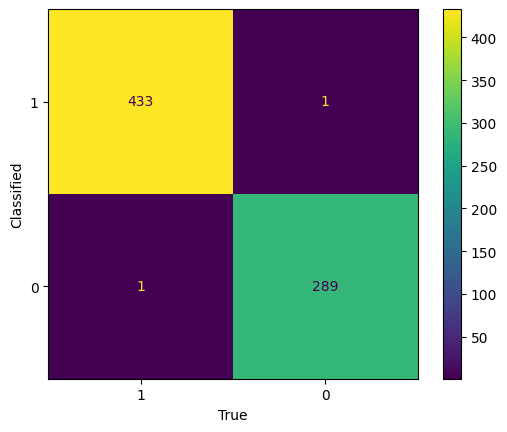

Sensitividade  Especificidade  Acurácia
0       0.997696        0.996552  0.997238

In [127]:
# Adicionando os valores previstos de probabilidade na base de dados
dados['phat'] = modelo.predict()

#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=dados['Target'],
                predicts=dados['phat'],
                cutoff=0.50)

In [128]:
def espec_sens(observado,predicts):

    # adicionar objeto com os valores dos predicts
    values = predicts.values

    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)

    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []

    for cutoff in cutoffs:

        predicao_binaria = []

        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)

        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)

        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)

    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [129]:
dados_plotagem = espec_sens(observado = dados['Target'],
                            predicts = dados['phat'])
dados_plotagem

cutoffs  sensitividade  especificidade
0       0.00       1.000000        0.000000
1       0.01       1.000000        0.934483
2       0.02       1.000000        0.982759
3       0.03       1.000000        0.982759
4       0.04       1.000000        0.989655
..       ...            ...             ...
96      0.96       0.997696        0.996552
97      0.97       0.997696        0.996552
98      0.98       0.995392        0.996552
99      0.99       0.875576        0.996552
100     1.00       0.000000        1.000000

[101 rows x 3 columns]

In [130]:
def espec_sens(observado,predicts):

    # adicionar objeto com os valores dos predicts
    values = predicts.values

    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)

    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []

    for cutoff in cutoffs:

        predicao_binaria = []

        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)

        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)

        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)

    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

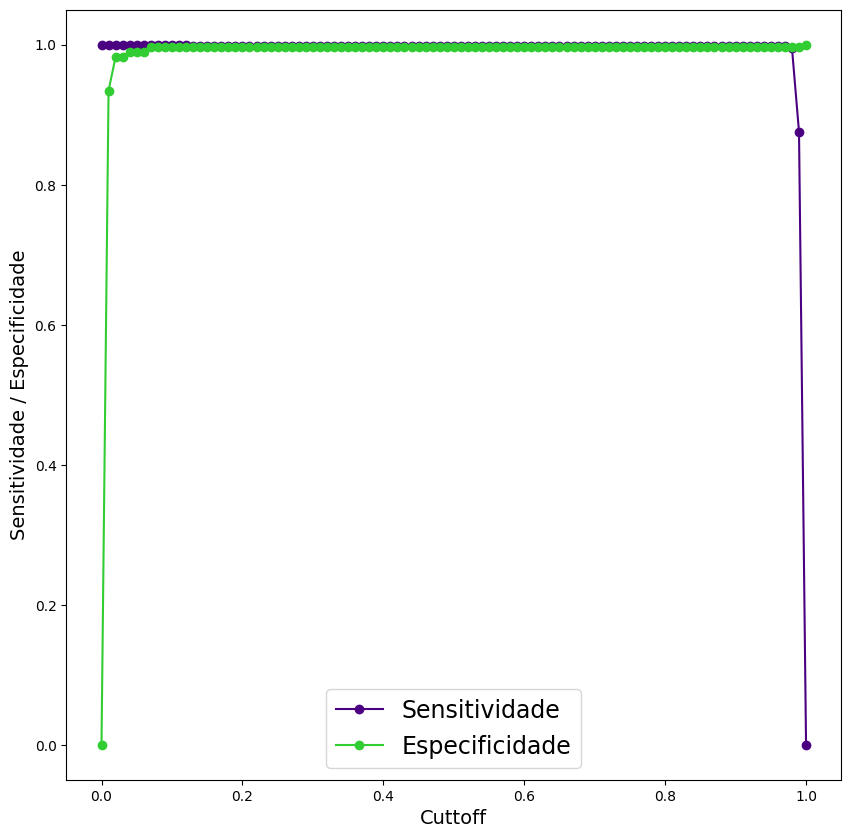

In [131]:
plt.figure(figsize=(10,10))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color='indigo')
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color='limegreen')
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel('Cuttoff', fontsize=14)
plt.ylabel('Sensitividade / Especificidade', fontsize=14)
plt.show()

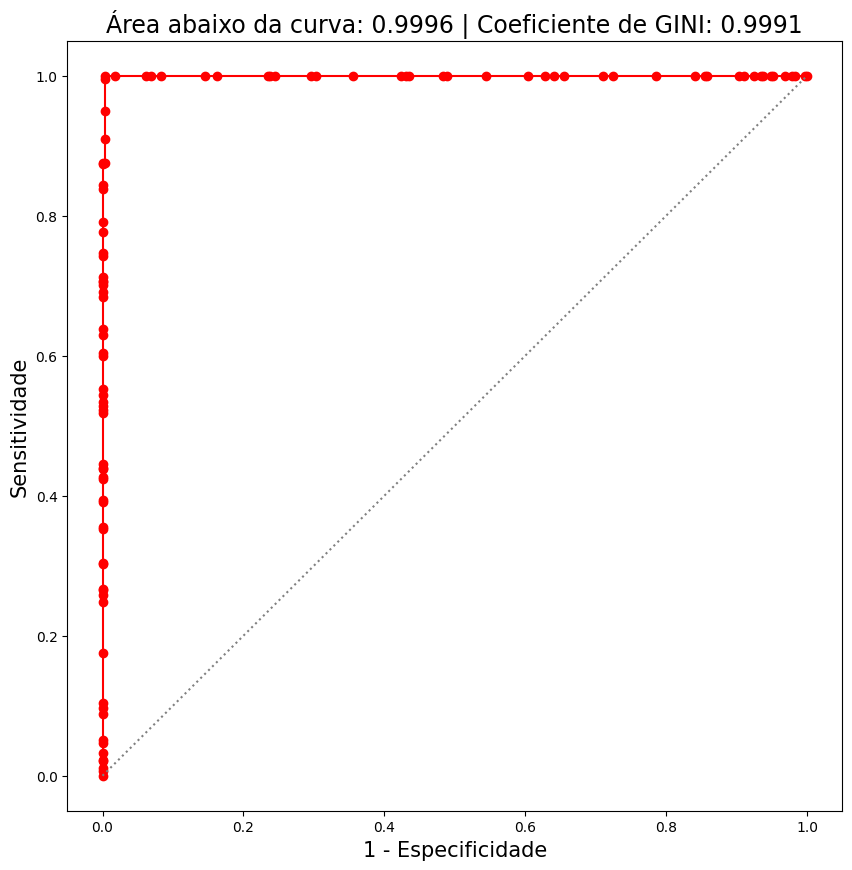

In [132]:
from sklearn.metrics import roc_curve, auc

#Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(dados['Target'],
                                dados['phat'])
roc_auc = auc(fpr, tpr)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

#Plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color='red')
plt.plot(fpr,fpr, ':', color='gray')
plt.title('Área abaixo da curva: %g' % round(roc_auc,4) +
          ' | Coeficiente de GINI: %g' % round(gini,4), fontsize=17)
plt.xlabel('1 - Especificidade', fontsize=15)
plt.ylabel('Sensitividade', fontsize=15)
plt.show()